In [1]:
%matplotlib notebook

import numpy as np
import glob, os
import g0_init_cfg as ic
from matplotlib import pyplot as plt
from astropy.io import fits

# ----- Importing IRAF from the root directory ----- #
current_dir = os.getcwd()
os.chdir(ic.dir_iraf)

from pyraf import iraf
from pyraf.iraf import gemini, gmos

os.chdir(current_dir)
iraf.chdir(current_dir)

uparm parameter list `/home/jlee/anaconda3/envs/geminiconda/iraf/noao/imred/ccdred/ccdtest/ccdtest.par' inconsistent with default parameters for IrafPkg `ccdtest'


In [2]:
# Find the gaps
iraf.sections('blkmask_@'+ic.lst_flat, Stdout='blkmask.lis')
iraf.delete('@blkmask.lis', verify='no')
iraf.delete('blkmask.lis', verify='no')

for flat in iraf.type(ic.lst_flat, Stdout=1):
    flat = flat.strip()
    iraf.gffindblocks('rg'+flat, 'erg'+flat, 'blkmask_'+flat)

1 512 113 117
1 512 386 392
1 512 663 665
1 512 937 939
1 512 1211 1213
1 512 1485 1487
1 512 1758 1760
1 512 2031 2033
1 512 2304 2306
1 512 2573 2575
1 512 2848 2851
1 512 3123 3125
1 512 3396 3398
1 512 3671 3673
1 512 3944 3946
15 gaps found


In [3]:
iraf.type(ic.lst_flat, Stdout=1)

['S20190228S0015']

In [4]:
# Reading FITS images
flat_img = iraf.type(ic.lst_flat, Stdout=1)[0]
print(flat_img)

flat_name = 'rg'+flat_img+'.fits'
fits.open(flat_name).info()

hdr_num = 1
rg = fits.getdata(flat_name, extn=hdr_num)
np.shape(rg)

S20190228S0015
Filename: rgS20190228S0015.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     395   ()      
  1  SCI           1 ImageHDU        71   (512, 4176)   float32   
  2  SCI           2 ImageHDU        71   (512, 4176)   float32   
  3  SCI           3 ImageHDU        71   (512, 4176)   float32   
  4  SCI           4 ImageHDU        71   (512, 4176)   float32   
  5  SCI           5 ImageHDU        71   (512, 4176)   float32   
  6  SCI           6 ImageHDU        71   (512, 4176)   float32   
  7  SCI           7 ImageHDU        71   (512, 4176)   float32   
  8  SCI           8 ImageHDU        71   (512, 4176)   float32   
  9  SCI           9 ImageHDU        71   (512, 4176)   float32   
 10  SCI          10 ImageHDU        71   (512, 4176)   float32   
 11  SCI          11 ImageHDU        71   (512, 4176)   float32   
 12  SCI          12 ImageHDU        71   (512, 4176)   float32   
 13  MDF           1 BinTableHDU    

(4176, 512)

In [5]:
# Reading blkmask file made by IRAF/Gemini package
msk_ascii = np.genfromtxt('blkmask_'+flat_img, dtype=int)
print(msk_ascii)

# Mask flagging (int_msk : from IRAF/Gemini)
int_msk = rg*0

for i in np.arange(msk_ascii.shape[0]):
    reg = (msk_ascii[i]-1).tolist()
    int_msk[reg[2]:reg[3]+1, reg[0]:reg[1]+1] = 1

bin_msk = (int_msk == 1)

[[   1  512  113  117]
 [   1  512  386  392]
 [   1  512  663  665]
 [   1  512  937  939]
 [   1  512 1211 1213]
 [   1  512 1485 1487]
 [   1  512 1758 1760]
 [   1  512 2031 2033]
 [   1  512 2304 2306]
 [   1  512 2573 2575]
 [   1  512 2848 2851]
 [   1  512 3123 3125]
 [   1  512 3396 3398]
 [   1  512 3671 3673]
 [   1  512 3944 3946]]


<IPython.core.display.Javascript object>


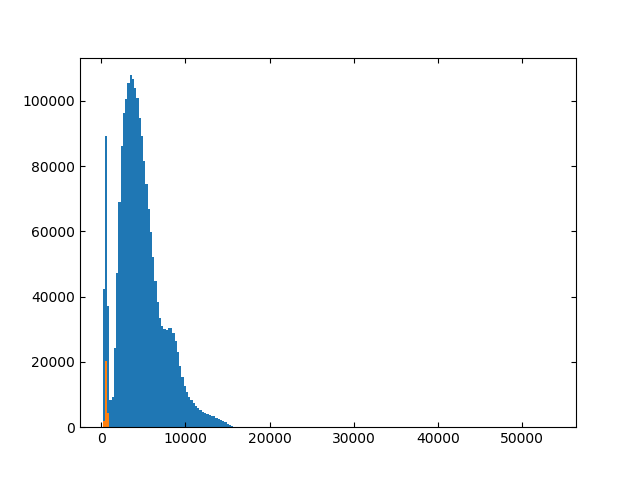

In [6]:
fig, ax = plt.subplots()
n1, bins1, x1 = ax.hist(rg.flatten(), bins=200)
n2, bins2, x2 = ax.hist(rg[bin_msk].flatten(), bins=bins1)

<IPython.core.display.Javascript object>


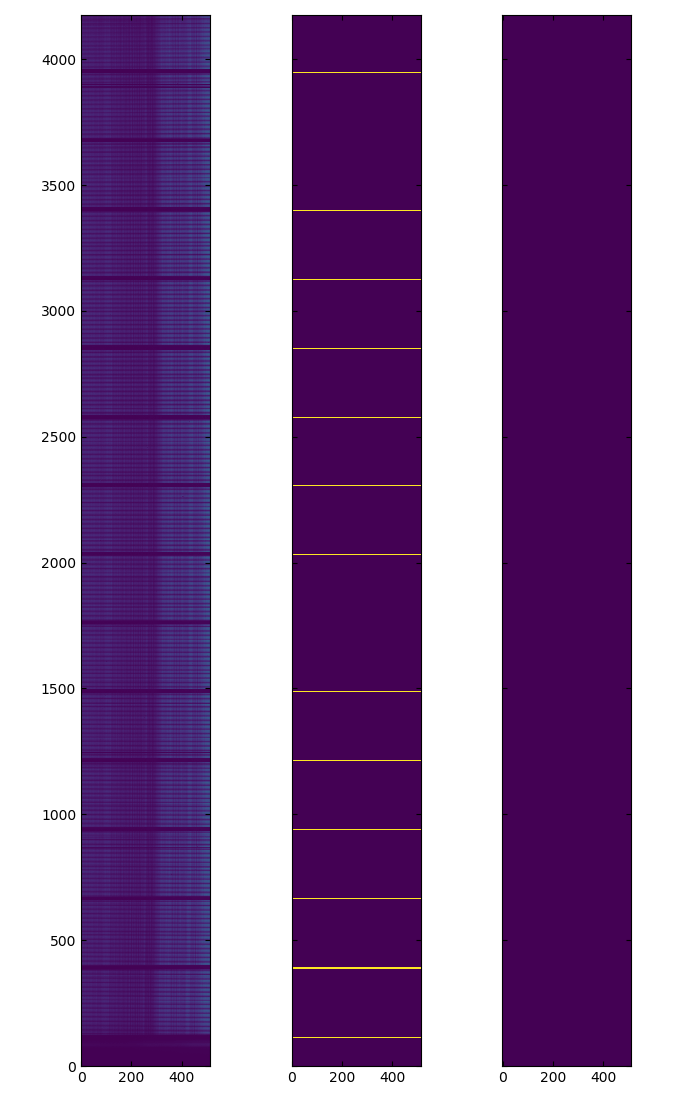

In [7]:
fig, ax = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(7,11))
ax[0].imshow(rg, origin='lower')
ax[1].imshow(int_msk, origin='lower')
ax[2].imshow((bin_msk & (rg > 1.0e+4)), origin='lower')
# ax[3].imshow(rg[12].data*intmask, origin='lower')
fig.tight_layout()

<IPython.core.display.Javascript object>


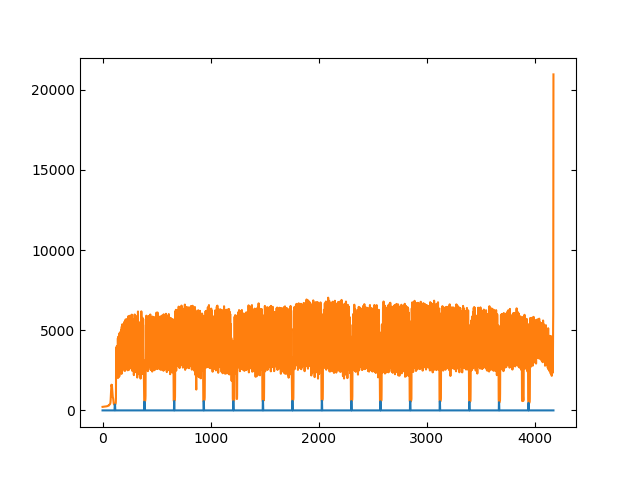

In [8]:
fig, ax = plt.subplots()
ax.plot(np.median(int_msk*rg, axis=1),zorder=+10)
ax.plot(np.median(rg, axis=1))

<IPython.core.display.Javascript object>


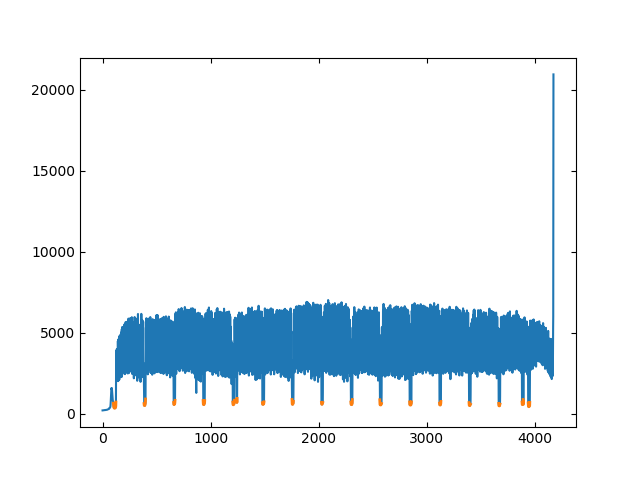

In [9]:
medi_val = np.median(rg, axis=1)

fig, ax = plt.subplots()
ax.plot(medi_val)

gaps = (medi_val < 1.0e+3)
jmsk = np.zeros(len(medi_val))
jmsk[~gaps] = np.nan
jmsk[gaps] = medi_val[gaps]
jmsk[:100] = np.nan
ax.plot(jmsk, linewidth=2.0, zorder=+10)

In [10]:
gap_width = 270
idx_jmsk = np.arange(len(jmsk))[np.isnan(jmsk) == False]
print(idx_jmsk)
div_jmsk = idx_jmsk / gap_width
print(idx_jmsk / gap_width)

[ 100  101  102  103  104  105  106  107  108  109  110  111  112  113
  114  115  116  117  118  119  120  121  122  123  124  384  385  386
  387  388  389  390  391  392  393  394  395  396  397  398  658  659
  660  661  662  663  664  665  666  667  668  669  670  671  931  932
  933  934  935  936  937  938  939  940  941  942  943  944  945  946
 1206 1207 1208 1209 1210 1211 1212 1213 1214 1215 1216 1217 1218 1219
 1220 1242 1243 1244 1245 1246 1480 1481 1482 1483 1484 1485 1486 1487
 1488 1489 1490 1491 1492 1493 1494 1495 1754 1755 1756 1757 1758 1759
 1760 1761 1762 1763 1764 1765 1766 1767 2027 2028 2029 2030 2031 2032
 2033 2034 2035 2036 2037 2038 2039 2299 2300 2301 2302 2303 2304 2305
 2306 2307 2308 2309 2310 2311 2312 2313 2567 2568 2569 2570 2571 2572
 2573 2574 2575 2576 2577 2578 2579 2580 2581 2582 2583 2843 2844 2845
 2846 2847 2848 2849 2850 2851 2852 2853 2854 2855 2856 2857 2858 2859
 2860 3120 3121 3122 3123 3124 3125 3126 3127 3128 3129 3130 3131 3132
 3133 

In [11]:
gap_half = 2

idx = idx_jmsk[div_jmsk == 0]
idx_min = idx[jmsk[idx] == np.min(jmsk[idx])]
# idx_min = idx[jmsk[idx] == np.min(jmsk[idx])]
idx_gap = np.zeros((len(np.unique(div_jmsk)), 2))

for i in np.unique(div_jmsk):
    idx = idx_jmsk[div_jmsk == i]
    idx_min = idx[jmsk[idx] == np.min(jmsk[idx])]
    jmsk[idx] = np.nan
    jmsk[int(idx_min-gap_half):int(idx_min+gap_half+1)] = medi_val[int(idx_min-gap_half):int(idx_min+gap_half+1)]
    print(int(idx_min-gap_half), int(idx_min+gap_half))
    idx_gap[i] = (int(idx_min-gap_half), int(idx_min+gap_half))

(110, 114)
(388, 392)
(660, 664)
(935, 939)
(1210, 1214)
(1485, 1489)
(1757, 1761)
(2030, 2034)
(2302, 2306)
(2573, 2577)
(2849, 2853)
(3123, 3127)
(3398, 3402)
(3672, 3676)
(3946, 3950)


<IPython.core.display.Javascript object>


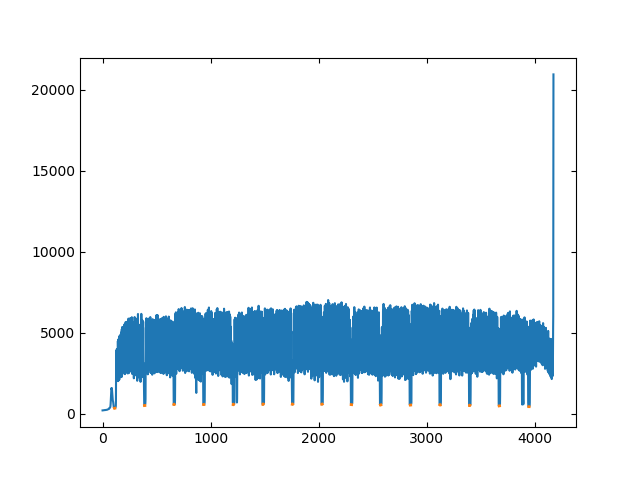

In [12]:
fig, ax = plt.subplots()
ax.plot(medi_val)
ax.plot(jmsk, linewidth=2.0, zorder=+10)

In [13]:
msk_jh = np.zeros(np.shape(msk_ascii))
for i in np.arange(np.shape(msk_jh)[0]):
    msk_jh[i] = np.array([1, np.shape(rg)[1], int(idx_gap[i,0]), int(idx_gap[i,1])])
msk_jh = msk_jh.astype('int')
print(msk_jh)

[[   1  512  110  114]
 [   1  512  388  392]
 [   1  512  660  664]
 [   1  512  935  939]
 [   1  512 1210 1214]
 [   1  512 1485 1489]
 [   1  512 1757 1761]
 [   1  512 2030 2034]
 [   1  512 2302 2306]
 [   1  512 2573 2577]
 [   1  512 2849 2853]
 [   1  512 3123 3127]
 [   1  512 3398 3402]
 [   1  512 3672 3676]
 [   1  512 3946 3950]]


In [14]:
f = open('newblkmask_'+flat_img+'_hdr{0:02d}'.format(hdr_num), 'w')
for i in np.arange(np.shape(msk_jh)[0]):
    f.write(str(msk_jh[i,0])+' '+str(msk_jh[i,1])+' '+str(msk_jh[i,2])+' '+str(msk_jh[i,3])+'\n')
f.close()